# ML Project: Directing Customers To Subscription Through Financial App Behavior Analysis

# 

# Import Libraries

In [1]:
import numpy as np # for numeric calculation
import pandas as pd # for data analysis and manupulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from dateutil import parser # convert time in date time data type

# Import dataset & explore

In [2]:
fineTech_appData = pd.read_csv("FineTech_appData.csv")

fineTech_appData.shape # get shape of dataset

(50000, 12)

In [3]:
fineTech_appData.head(6)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0


In [4]:
fineTech_appData.tail(6)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
49994,90813,2013-02-25 19:35:12.691,0,19:00:00,36,"idscreen,joinscreen,Cycle,product_review,produ...",25,0,0,1,2013-02-25 19:36:56.082,0
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0
49999,27047,2012-12-14 01:22:44.638,4,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,NaN,1


### screen_list is not visible so I have to print it

In [5]:
for i in range(5):
    print(fineTech_appData.loc[i,'screen_list'],'\n')

idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login 

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 



### Explaination of dataset

In [6]:
fineTech_appData.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [7]:
fineTech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [8]:
fineTech_appData.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Get the unique value of each columns and it's length
features = fineTech_appData.columns
for i in features:
    print("""Uniqie value of {}\n{} \n len is {} \n..............................\n
    """.format(i,fineTech_appData[i].unique(),len(fineTech_appData[i].unique())))

Uniqie value of user
[235136 333588 254414 ... 302367 324905  27047] 
 len is 49874 
..............................

    
Uniqie value of first_open
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638'] 
 len is 49747 
..............................

    
Uniqie value of dayofweek
[3 6 1 4 2 0 5] 
 len is 7 
..............................

    
Uniqie value of hour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00'] 
 len is 24 
..............................

    
Uniqie value of age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60 

In [10]:
# The ‘hour’ column contains object data type, so we converted into integer data type format.

In [11]:
fineTech_appData['hour'] = fineTech_appData.hour.str.slice(1,3).astype(int)
fineTech_appData['hour']

0         2
1         1
2        19
3        16
4        18
         ..
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int32

In [12]:
# get data type of each columns
fineTech_appData.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [13]:
# To visualize the data need numeric values for that we drop some columns that datatype is the object.

In [14]:
# drop object dtype columns
fineTech_appData2 = fineTech_appData.drop(['user', 'first_open', 'screen_list', 'enrolled_date'], axis = 1)

In [15]:
fineTech_appData2.head(6)

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1
5,2,9,20,14,0,0,1,0


# Data visualization

## Heatmap using the correlation matrix

Text(0.5, 1.0, 'Heatmap using correlation matrix of fineTech_appData2')

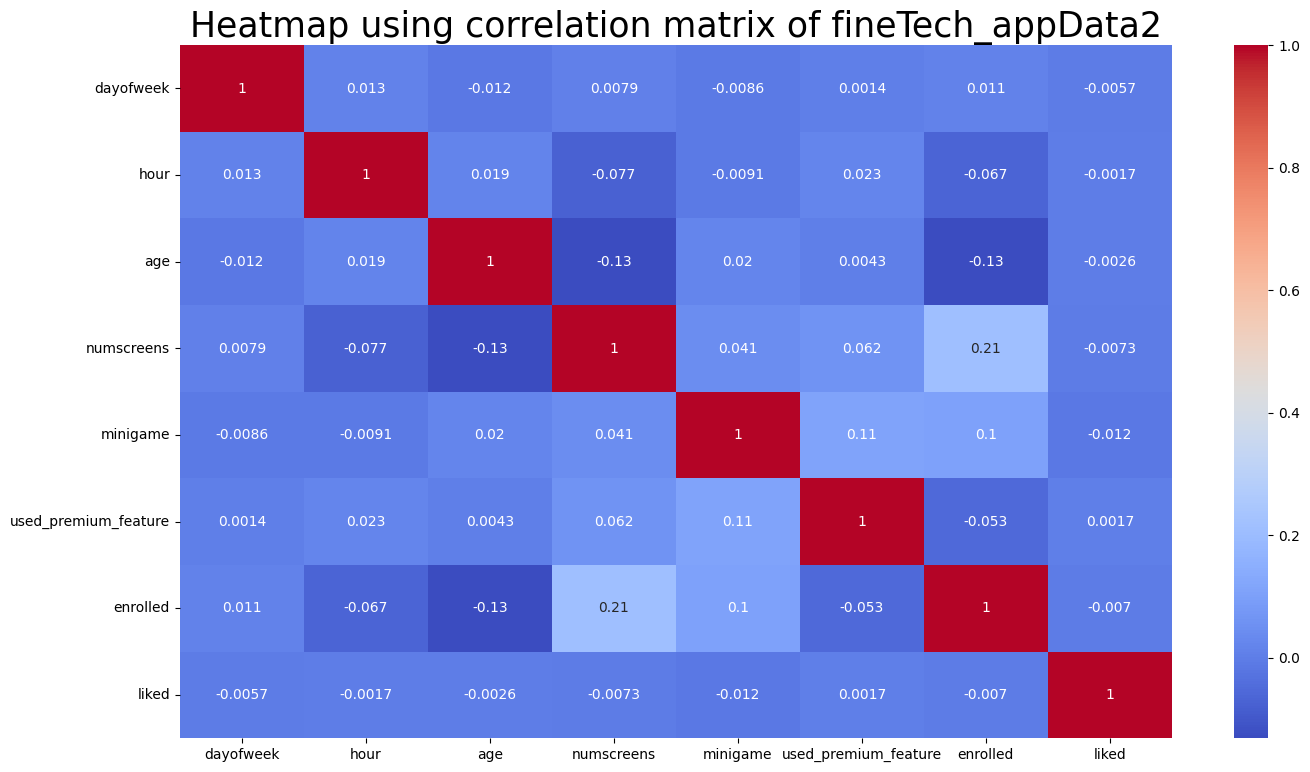

In [16]:
# Heatmap 

plt.figure(figsize=(16,9))
sns.heatmap(fineTech_appData2.corr(),annot=True,cmap='coolwarm')
plt.title("Heatmap using correlation matrix of fineTech_appData2", fontsize = 25)

In [17]:
# The pair plot helps to visualize the distribution of data and scatter plot.
# sns.pairplot(fineTech_appData2,hue='enrolled')

In [18]:
# In pair plot we can see, the maximum features have two values 0 and 1. So we have to plot countplot of enrolled data

In [19]:
fineTech_appData.enrolled.value_counts()

enrolled
1    31074
0    18926
Name: count, dtype: int64

<Axes: xlabel='enrolled', ylabel='count'>

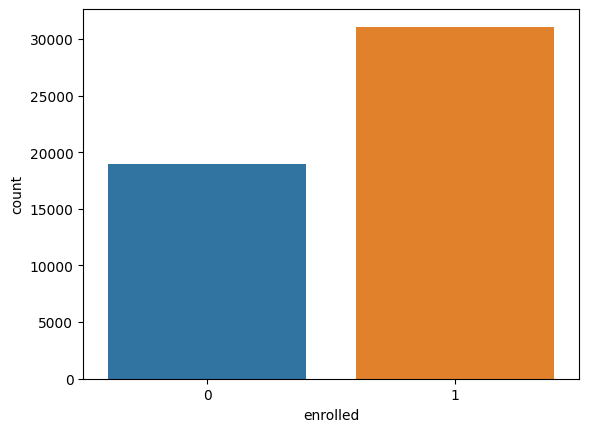

In [20]:
# Show counterplot of 'enrolled' feature
sns.countplot(data=fineTech_appData2,x=fineTech_appData['enrolled'])

In [21]:
# value enrolled and not enrolled customers
print('Not enrolled user = ',(fineTech_appData.enrolled <1).sum(), "Out of 50000")
print('Enrolled user =',50000-(fineTech_appData.enrolled <1).sum(), "Out of 50000")

Not enrolled user =  18926 Out of 50000
Enrolled user = 31074 Out of 50000


### Histrogram of each feature

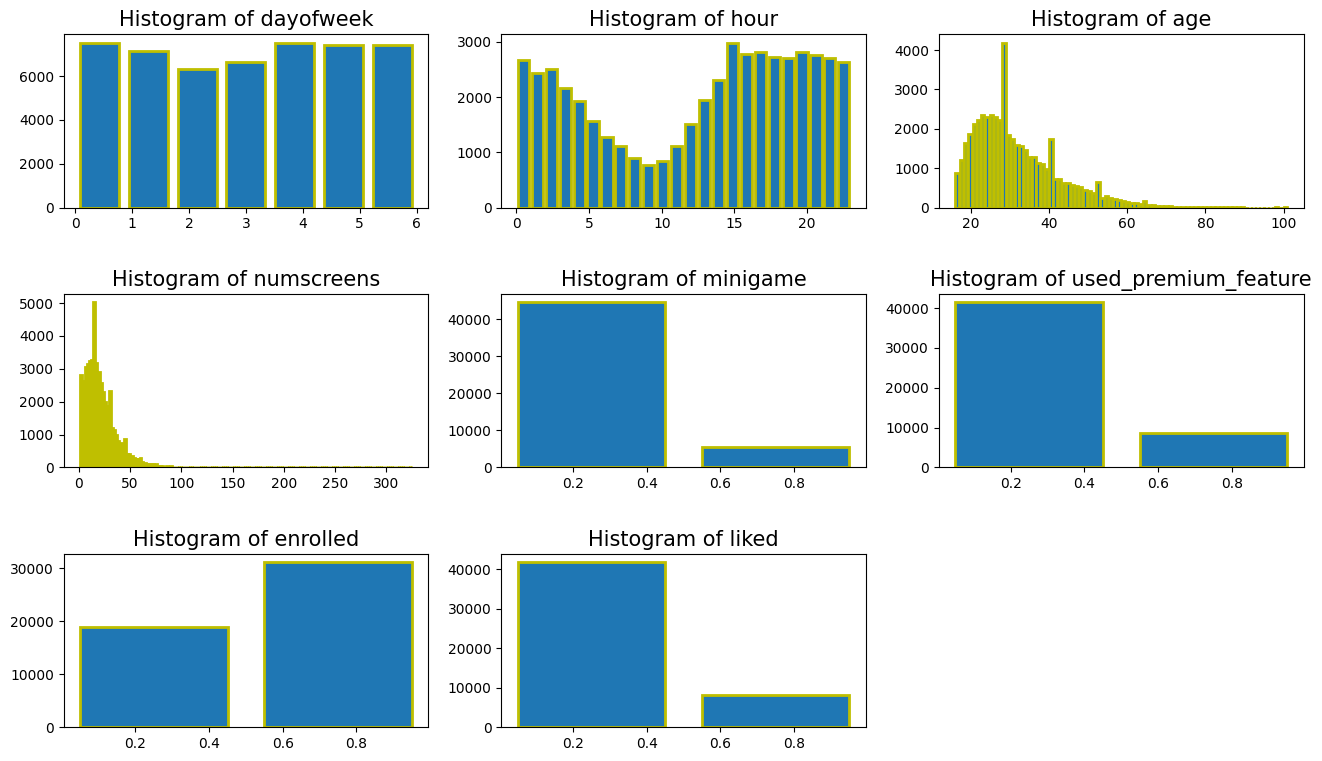

In [22]:
# Plot Histrogram

plt.figure(figsize=(16,9))
features = fineTech_appData2.columns
for i,j in enumerate(features):
    plt.subplot(3,3,i+1)
    plt.title("Histogram of {}".format(j), fontsize = 15) # title of histogram
    
    bins = len(fineTech_appData2[j].unique()) # bins for histogram
    plt.hist(fineTech_appData2[j],bins=bins, rwidth = 0.8, edgecolor = "y", linewidth = 2)

plt.subplots_adjust(hspace=0.5) # space between horixontal axes

### Correlation barplot with ‘enrolled’ feature

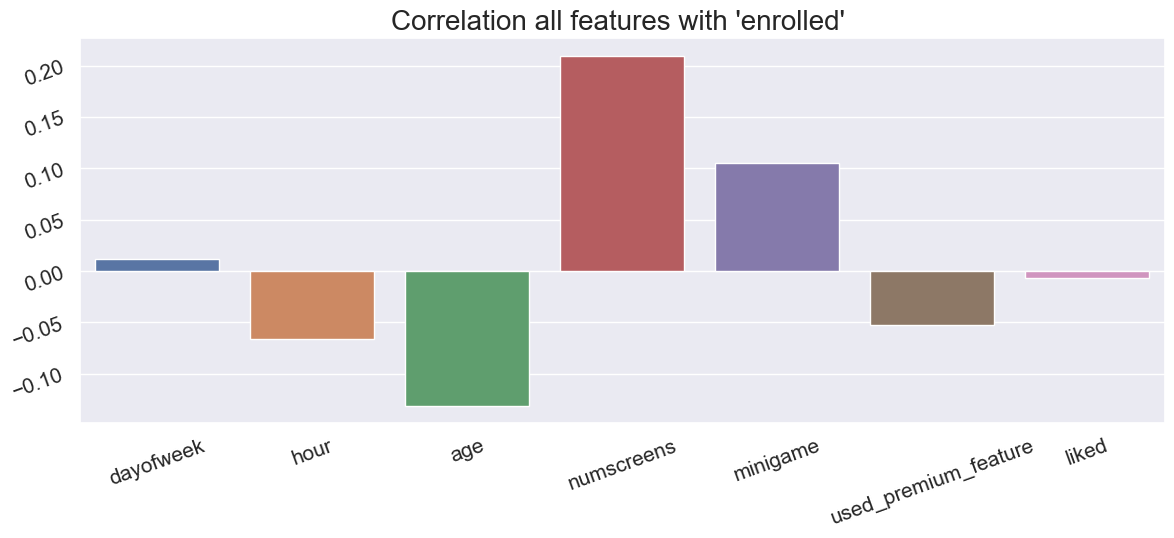

In [23]:
# show corelation barplot 
 
sns.set() # set background dark grid
plt.figure(figsize = (14,5))
plt.title("Correlation all features with 'enrolled' ", fontsize = 20)
fineTech_appData3 = fineTech_appData2.drop(['enrolled'], axis = 1) # drop 'enrolled' feature
ax =sns.barplot(x=fineTech_appData3.columns,y=(fineTech_appData3.corrwith(fineTech_appData2.enrolled))) # plot barplot 
ax.tick_params(labelsize=15, labelrotation = 20, color ="k") # decorate x & y ticks font

In [24]:
fineTech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  int32 
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int32(1), int64(8), object(3)
memory usage: 4.4+ MB


In [25]:
# Parser is used for converting most know formats to date and time format.

In [26]:
fineTech_appData['first_open'] = [parser.parse(i) for i in fineTech_appData['first_open']]
fineTech_appData['enrolled_date'] = [parser.parse(i) if isinstance(i,str) else i for i in fineTech_appData['enrolled_date']]

In [27]:
fineTech_appData.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [28]:

fineTech_appData['time_to_enrolled']  = (fineTech_appData.enrolled_date - fineTech_appData.first_open).dt.days


In [29]:
fineTech_appData['time_to_enrolled'].value_counts()

time_to_enrolled
0.0      23863
1.0        924
2.0        545
3.0        406
5.0        312
         ...  
203.0        1
220.0        1
206.0        1
210.0        1
197.0        1
Name: count, Length: 215, dtype: int64

### Showing the distribution of time taken to enrolled the app.

(array([2.8208e+04, 1.0410e+03, 5.4500e+02, 4.3300e+02, 2.7900e+02,
        1.8200e+02, 1.6500e+02, 9.4000e+01, 1.0500e+02, 2.2000e+01]),
 array([  0. ,  22.6,  45.2,  67.8,  90.4, 113. , 135.6, 158.2, 180.8,
        203.4, 226. ]),
 <BarContainer object of 10 artists>)

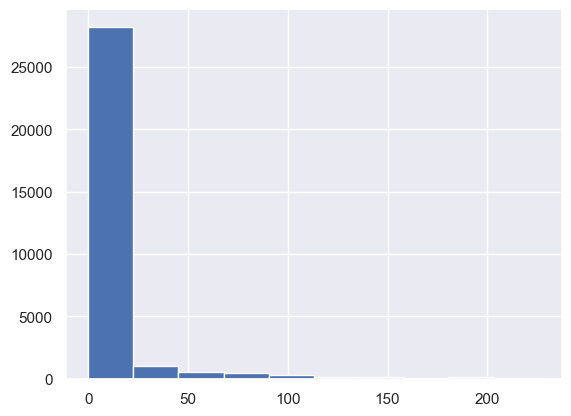

In [30]:
# Plot histrogram
plt.hist(fineTech_appData['time_to_enrolled'].dropna())

(array([27037.,   981.,   544.,   469.,   321.,   260.,   219.,   200.,
          179.,   173.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

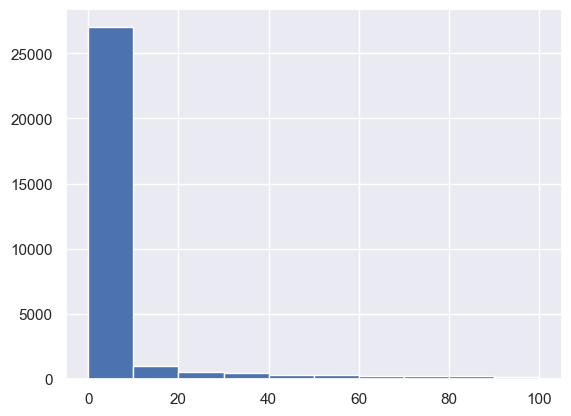

In [31]:
# let’s try to show the distribution in range 0 to 100 hours.

# Plot histogram
plt.hist(fineTech_appData['time_to_enrolled'].dropna(), range = (0,100)) 

In [32]:
# In the above histrogram, we know that most of the user enroll in 10 hours of registration.

# Feature Selection


### Let's assume, customers who enrolled after 48 hours is 0

In [33]:
# Those customers have enrolled after 48 hours set as 0
fineTech_appData.loc[fineTech_appData.time_to_enrolled>48,'enrolled']=0

In [34]:
fineTech_appData.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,time_to_enrolled
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


In [35]:
# Drop some ‘time_to_enrolled’, ‘enrolled_date’, ‘first_open’ feature they are not strongly correlated to the result.

In [36]:
fineTech_appData.drop(columns = ['time_to_enrolled', 'enrolled_date', 'first_open'], inplace=True)

In [37]:
fineTech_appData.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


## Read another CSV file that contains the top screens name.

In [38]:
# read csv file and convert it into numpy array
fineTech_app_screen_Data = pd.read_csv("top_screens.csv").top_screens.values
 
fineTech_app_screen_Data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [39]:
fineTech_appData['screen_list'] = fineTech_appData.screen_list.astype('str')+ ','

In [40]:
fineTech_appData['screen_list']

0        idscreen,joinscreen,Cycle,product_review,ScanP...
1        joinscreen,product_review,product_review2,Scan...
2                                       Splash,Cycle,Loan,
3        product_review,Home,product_review,Loan3,Finan...
4        idscreen,joinscreen,Cycle,Credit3Container,Sca...
                               ...                        
49995    Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...
49996                  Cycle,Splash,Home,RewardsContainer,
49997    joinscreen,product_review,product_review2,Scan...
49998    Cycle,Home,product_review,product_review,produ...
49999    product_review,ScanPreview,VerifyDateOfBirth,V...
Name: screen_list, Length: 50000, dtype: object

In [41]:
# String into number
for screen_name in fineTech_app_screen_Data:
    fineTech_appData[screen_name] = fineTech_appData.screen_list.str.contains(screen_name).astype(int)
    fineTech_appData['screen_list'] = fineTech_appData.screen_list.str.replace(screen_name+",", "")

In [42]:
fineTech_appData.shape

(50000, 68)

In [43]:
# head of DataFrame
fineTech_appData.head(6)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,56480,2,9,20,"Home,ScanPreview,VerifySSN,product_review,prod...",14,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# remain screen in 'screen_list'
fineTech_appData.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [45]:
# count remain screen list and store counted number in 'remain_screen_list'
 
fineTech_appData['remain_screen_list'] = fineTech_appData.screen_list.str.count(",")

In [46]:
# Drop the 'screen_list'
fineTech_appData.drop(columns = ['screen_list'], inplace=True)

In [47]:
# total columns
fineTech_appData.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [48]:
# take sum of all saving screen in one place
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
fineTech_appData['saving_screens_count']=fineTech_appData[saving_screens].sum(axis=1)
fineTech_appData.drop(columns=saving_screens,inplace=True)

In [49]:
# similarly for credit, CC1 and loan screens.


credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
fineTech_appData['credit_screens_count'] = fineTech_appData[credit_screens].sum(axis = 1)
fineTech_appData.drop(columns = credit_screens, axis = 1, inplace = True)

cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
fineTech_appData['cc_screens_count'] = fineTech_appData[cc_screens].sum(axis = 1)
fineTech_appData.drop(columns = cc_screens, inplace = True)\

loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
fineTech_appData['loan_screens_count'] = fineTech_appData[loan_screens].sum(axis = 1)
fineTech_appData.drop(columns = loan_screens, inplace = True)

In [50]:
fineTech_appData.shape

(50000, 50)

In [51]:
fineTech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int32
 10  Institutions             50000 non-null  int32
 11  VerifyPhone              50000 non-null  int32
 12  BankVerification         50000 non-null  int32
 13  VerifyDateOfBirth        50000 non-null  int32
 14  ProfilePage              50000 non-null  int32
 15  Ve

# Heatmap with the correlation matrix

<Axes: >

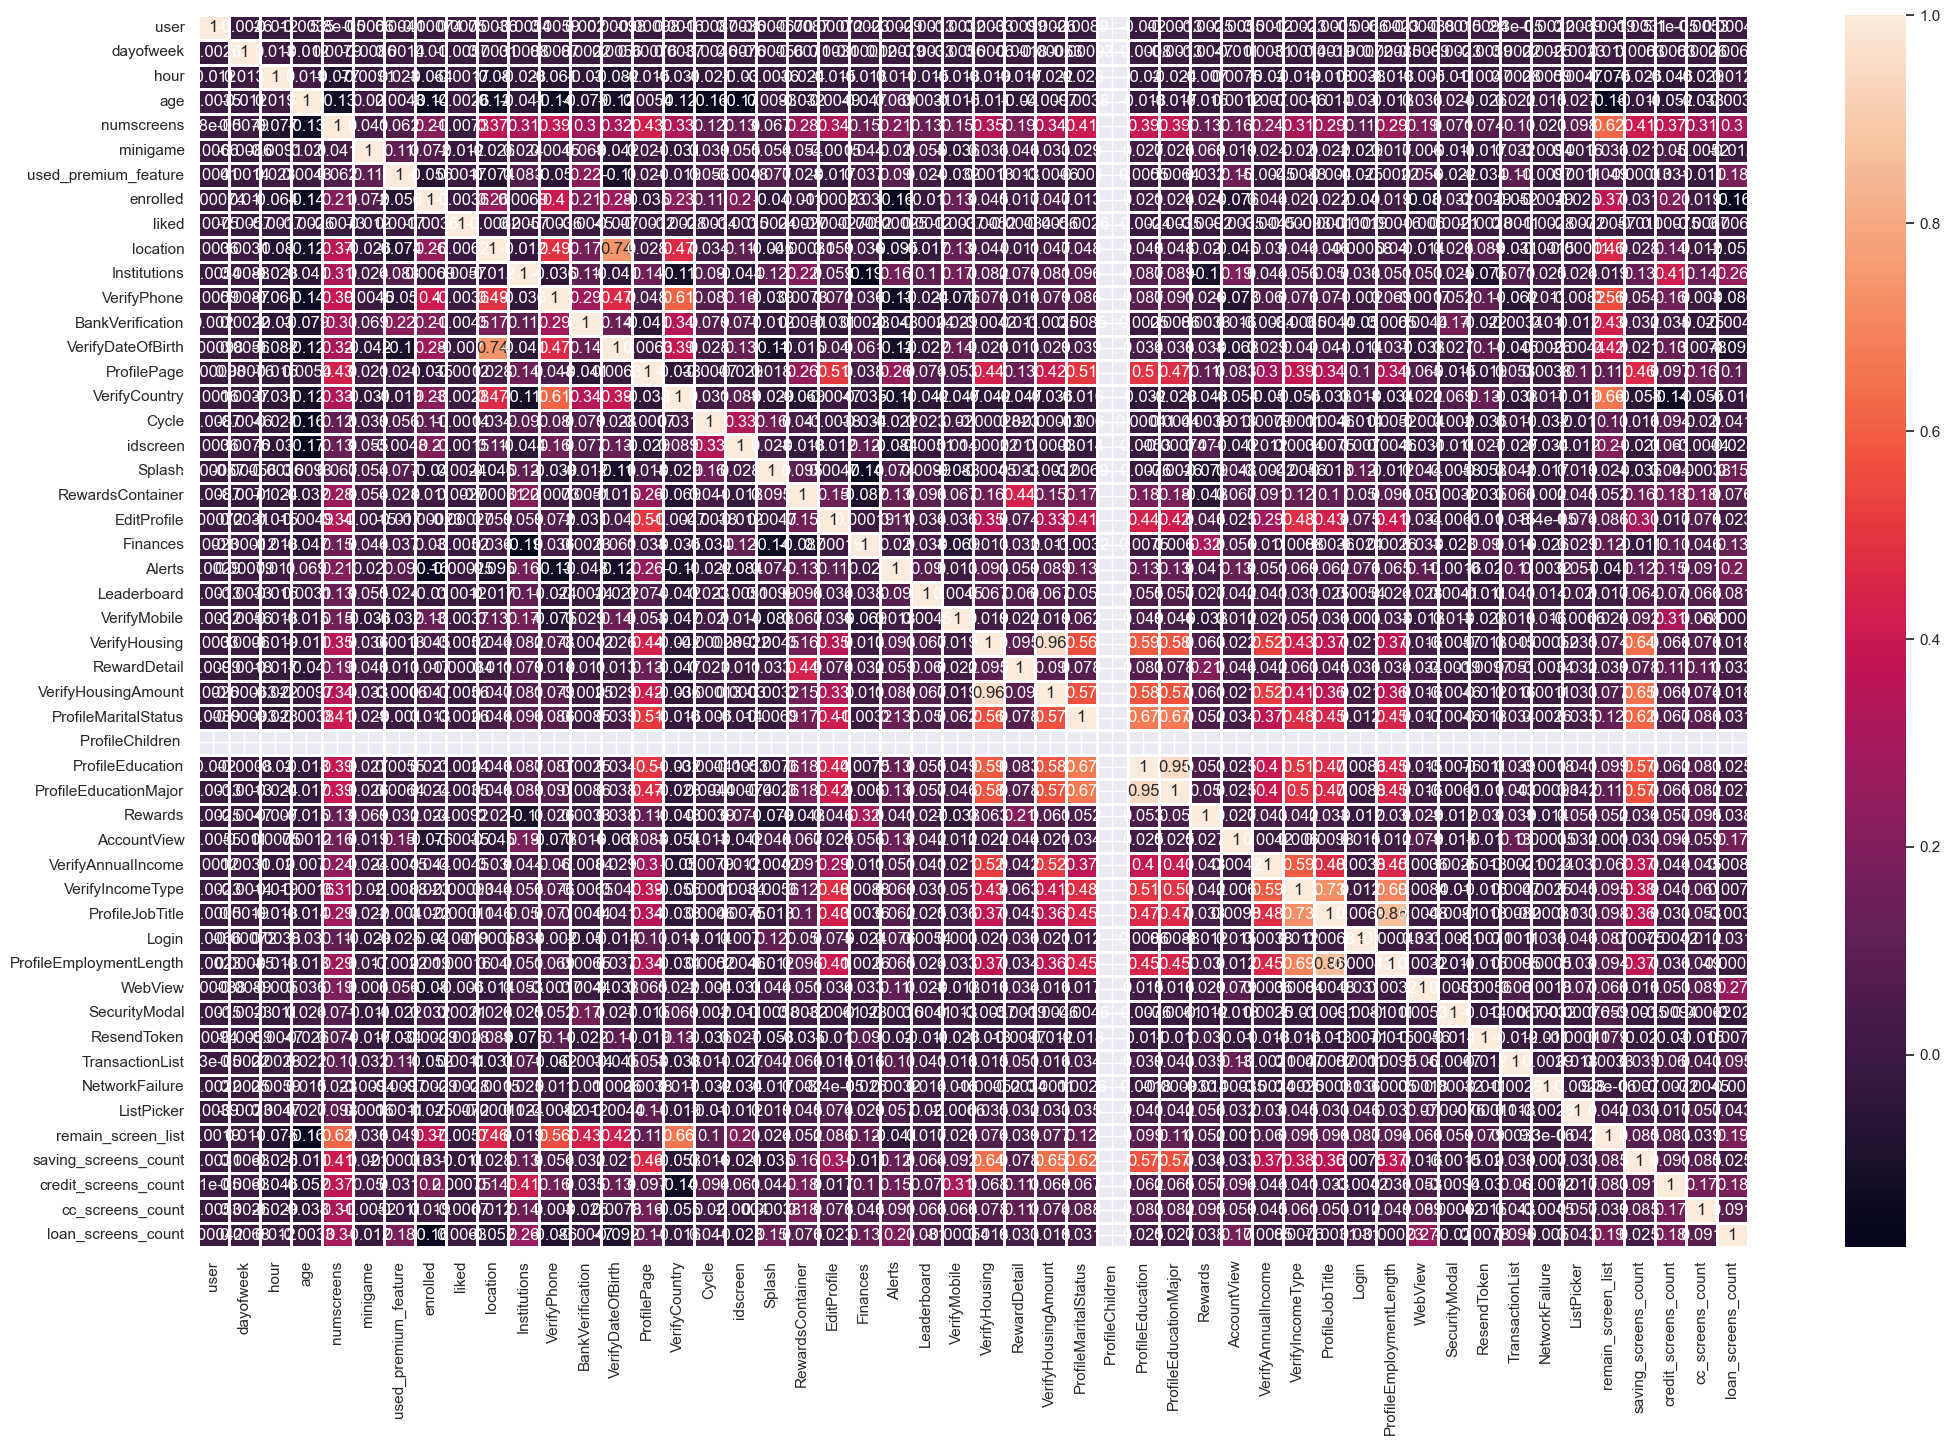

In [52]:
# Heatmap with correlation matrix of new fineTech_appData
 
plt.figure(figsize = (25,16)) 
sns.heatmap(fineTech_appData.corr(), annot = True, linewidth =2)

# Data preprocessing


## Split dataset in Train and Test

In [53]:
clean_fineTech_appData = fineTech_appData
target = fineTech_appData['enrolled']
fineTech_appData.drop(columns='enrolled',inplace=True)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(fineTech_appData,target,test_size=0.2,random_state=0)

In [56]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (40000, 49)
Shape of X_test =  (10000, 49)
Shape of y_train =  (40000,)
Shape of y_test =  (10000,)


In [57]:
# take User ID in another variable 
train_userID = X_train['user']
X_train.drop(columns= 'user', inplace =True)
test_userID = X_test['user']
X_test.drop(columns= 'user', inplace =True)

In [58]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of train_userID = ', train_userID.shape)
print('Shape of test_userID = ', test_userID.shape)

Shape of X_train =  (40000, 48)
Shape of X_test =  (10000, 48)
Shape of train_userID =  (40000,)
Shape of test_userID =  (10000,)


# Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

# Machine Learning Model Building

## Logistic Regression

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 0)
lr_model.fit(X_train,y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_score(y_test, y_pred_lr)

C:\Users\ankur\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.742

In [62]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('logisticregression', LogisticRegression())])

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.


0.7424

In [63]:
# impoer required packages
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt_model.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_model.predict(X_test_sc)
accuracy_score(y_test, y_pred_dt_sc)

0.7063

# K – Nearest Neighbor Classifier


In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test_sc)

accuracy_score(y_test, y_pred_knn)

C:\Users\ankur\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.5244

# Naive Bayes Classifier

In [69]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
 
accuracy_score(y_test, y_pred_nb)

0.7017

In [70]:
# train with Standert Scaling dataset
nb_model2 = GaussianNB()
nb_model2.fit(X_train_sc, y_train)
y_pred_nb_sc = nb_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_nb_sc)

0.7011

# Random Forest Classifier

In [71]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
 
accuracy_score(y_test, y_pred_rf)

0.7542

In [72]:
# train with Standert Scaling dataset
rf_model2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_rf_sc)

0.754

# Support Vector Classifier

In [73]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
 
accuracy_score(y_test, y_pred_svc)

0.7393

In [74]:
# train with Standert Scaling dataset
svc_model2 = SVC()
svc_model2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_svc_sc)

0.768

# XGBoost Classifier

In [76]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

0.7742

In [77]:
# train with Standert Scaling dataset
xgb_model2 = XGBClassifier()
xgb_model2.fit(X_train_sc, y_train)
y_pred_xgb_sc = xgb_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_xgb_sc)

0.7742

In [78]:
# Clasification Report
cr_xgb_pt2 = classification_report(y_test, y_pred_xgb_sc)
 
print("Classification report >>> \n", cr_xgb_pt2)

Classification report >>> 
               precision    recall  f1-score   support

           0       0.73      0.72      0.72      4151
           1       0.80      0.82      0.81      5849

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



# Cross-validation of the ML model

### To find the ML model is overfitted, under fitted or generalize doing cross-validation.

In [79]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_model, X = X_train_sc, y = y_train, cv = 10)
print("Cross validation of XGBoost model = ",cross_validation)
print("Cross validation of XGBoost model (in mean) = ",cross_validation.mean())

Cross validation of XGBoost model =  [0.7805  0.775   0.784   0.77675 0.7895  0.785   0.78675 0.781   0.784
 0.76675]
Cross validation of XGBoost model (in mean) =  0.780925


# Mapping predicted output to the target

In [80]:
final_result = pd.concat([test_userID, y_test], axis = 1)
final_result['predicted result'] = y_pred_xgb_sc
 
print(final_result)

         user  enrolled  predicted result
11841  239786         1                 1
19602  279644         1                 1
45519   98290         0                 0
25747  170150         1                 1
42642  237568         1                 0
...       ...       ...               ...
25091  143036         1                 1
27853   91158         1                 1
47278  248318         0                 0
37020  142418         1                 1
2217   279355         1                 0

[10000 rows x 3 columns]


# Save the Machine Learning model

In [85]:
## Pickle
import pickle
 
# save model
pickle.dump(xgb_model, open('FineTech_app_ML_model.pickle', 'wb'))
 
# load model
ml_model_pl = pickle.load(open('FineTech_app_ML_model.pickle', 'rb'))
 


In [86]:
# predict the output
y_pred_pl = ml_model_pl.predict(X_test)
 
# confusion matrix
cm_pl = confusion_matrix(y_test, y_pred_pl)
print('Confussion matrix = \n', cm_pl)
 
# show the accuracy
print("Accuracy of model = ",accuracy_score(y_test, y_pred_pl))

Confussion matrix = 
 [[2974 1177]
 [1081 4768]]
Accuracy of model =  0.7742
